In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [3]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


### Data Preprocessing

In [4]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [6]:
df.shape

(53392, 33)

In [7]:
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

#### Dropping the columns with maximum or  containing only null values and also some columns which are reductant or not helping in predictions

In [8]:
objects=df.select_dtypes(include=['object']).columns
objects

Index(['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic',
       'Question', 'Data_Value_Type', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Total', 'Age(years)', 'Education', 'Gender',
       'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [9]:
numeric=df.select_dtypes(include=['int64','float']).columns
numeric

Index(['YearStart', 'YearEnd', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'LocationID'],
      dtype='object')

In [10]:
columns_to_drop = ["LocationAbbr","Datasource","Topic","Data_Value_Type","Data_Value_Footnote_Symbol","Data_Value_Footnote","Data_Value_Unit", "Data_Value_Footnote_Symbol","Total","ClassID","TopicID","QuestionID","DataValueTypeID",
                   "StratificationCategory1","Stratification1","StratificationCategoryId1","StratificationID1","Data_Value_Footnote","Data_Value_Alt","Low_Confidence_Limit","High_Confidence_Limit ","Sample_Size"]
df = df.drop(columns=columns_to_drop, errors='ignore')

df.columns

Index(['YearStart', 'YearEnd', 'LocationDesc', 'Class', 'Question',
       'Data_Value', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'LocationID'],
      dtype='object')

In [11]:
df.shape

(53392, 13)

In [12]:
df.describe()

,YearStart,YearEnd,Data_Value,LocationID
count,53392.000000,53392.000000,48346.000000,53392.000000
mean,2013.281465,2013.281465,31.156681,30.282215
std,1.693300,1.693300,10.247033,16.821318
min,2011.000000,2011.000000,0.900000,1.000000
25%,2012.000000,2012.000000,24.100000,17.000000
50%,2013.000000,2013.000000,30.700000,30.000000
75%,2015.000000,2015.000000,37.000000,44.000000
max,2016.000000,2016.000000,77.600000,78.000000


In [13]:
df.drop_duplicates()

,YearStart,YearEnd,LocationDesc,Class,Question,Data_Value,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID
0,2011,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1
1,2011,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1
2,2011,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1
3,2011,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1
4,2011,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,Asian,"(18.335765, -64.896335)",78
53388,2016,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,"(18.335765, -64.896335)",78
53389,2016,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,"(18.335765, -64.896335)",78
53390,2016,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,2 or more races,"(18.335765, -64.896335)",78


### Removing The Outliers

In [14]:
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [15]:
remove_outliers(df)
df

,YearStart,YearEnd,LocationDesc,Class,Question,Data_Value,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID
0,2011,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1
1,2011,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1
2,2011,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1
3,2011,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1
4,2011,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,Asian,"(18.335765, -64.896335)",78
53388,2016,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,"(18.335765, -64.896335)",78
53389,2016,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,"(18.335765, -64.896335)",78
53390,2016,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,2 or more races,"(18.335765, -64.896335)",78


### Imputation of numerical columns

In [16]:
numerical_col = df.select_dtypes(include=['int64', 'float']).columns
numerical = df[numerical_col]
numerical

,YearStart,YearEnd,Data_Value,LocationID
0,2011,2011,32.0,1
1,2011,2011,32.3,1
2,2011,2011,31.8,1
3,2011,2011,33.6,1
4,2011,2011,32.8,1
...,...,...,...,...
53387,2016,2016,NaN,78
53388,2016,2016,NaN,78
53389,2016,2016,NaN,78
53390,2016,2016,NaN,78


In [17]:
numerical = numerical.fillna(numerical.mean())
numerical

,YearStart,YearEnd,Data_Value,LocationID
0,2011,2011,32.000000,1
1,2011,2011,32.300000,1
2,2011,2011,31.800000,1
3,2011,2011,33.600000,1
4,2011,2011,32.800000,1
...,...,...,...,...
53387,2016,2016,30.624004,78
53388,2016,2016,30.624004,78
53389,2016,2016,30.624004,78
53390,2016,2016,30.624004,78


In [18]:
numerical.isna().sum()

YearStart     0
YearEnd       0
Data_Value    0
LocationID    0
dtype: int64

### Imputation of categorical columns

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical = df[categorical_cols]

# Fill missing values in categorical columns with mode
categorical = categorical.fillna(categorical.mode().iloc[0])

# Verify the updated counts of missing values
print(categorical.isnull().sum())


LocationDesc      0
Class             0
Question          0
Age(years)        0
Education         0
Gender            0
Income            0
Race/Ethnicity    0
GeoLocation       0
dtype: int64


### Encoding the categorical columns using LabelEncoder because the column seems to have an ordinal relationship

In [20]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    categorical[col] = label_encoder.fit_transform(categorical[col])

# Verifing the updated categorical data
print(categorical.head())

   LocationDesc  Class  Question  Age(years)  Education  Gender  Income  \
0             0      1         1           2          1       0       0   
1             0      1         1           2          1       1       0   
2             0      1         1           2          1       0       0   
3             0      1         1           2          2       0       0   
4             0      1         1           2          1       0       0   

   Race/Ethnicity  GeoLocation  
0               3            9  
1               3            9  
2               3            9  
3               3            9  
4               3            9  


### Visualizing the numerical columns

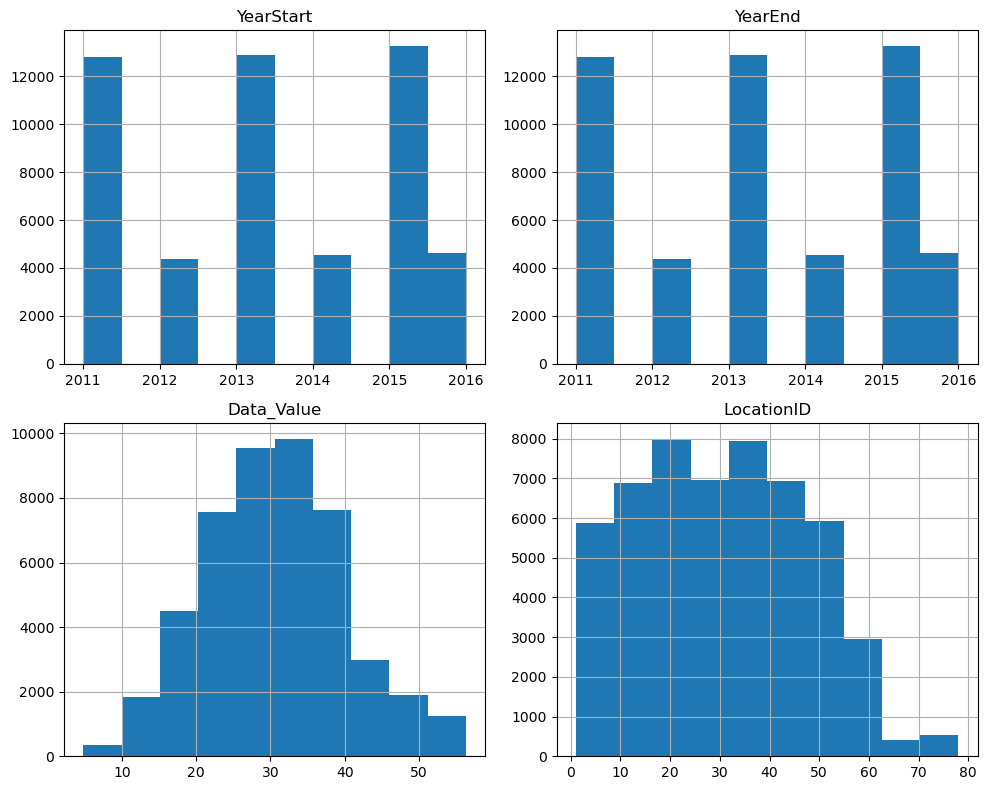

In [22]:
#Histograms
df[['YearStart', 'YearEnd', 'Data_Value', 'LocationID']].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


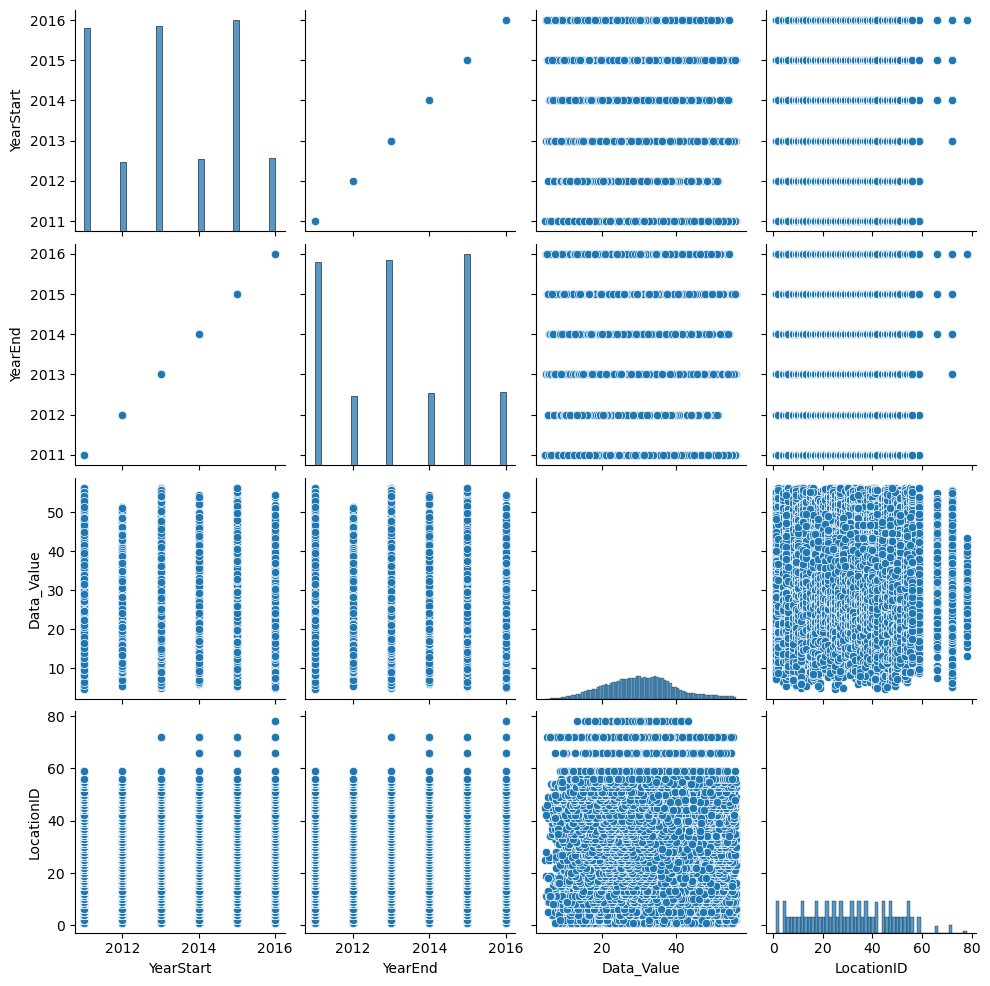

In [26]:
sns.pairplot(df[['YearStart', 'YearEnd', 'Data_Value', 'LocationID']])
plt.show()


<Figure size 1200x600 with 0 Axes>

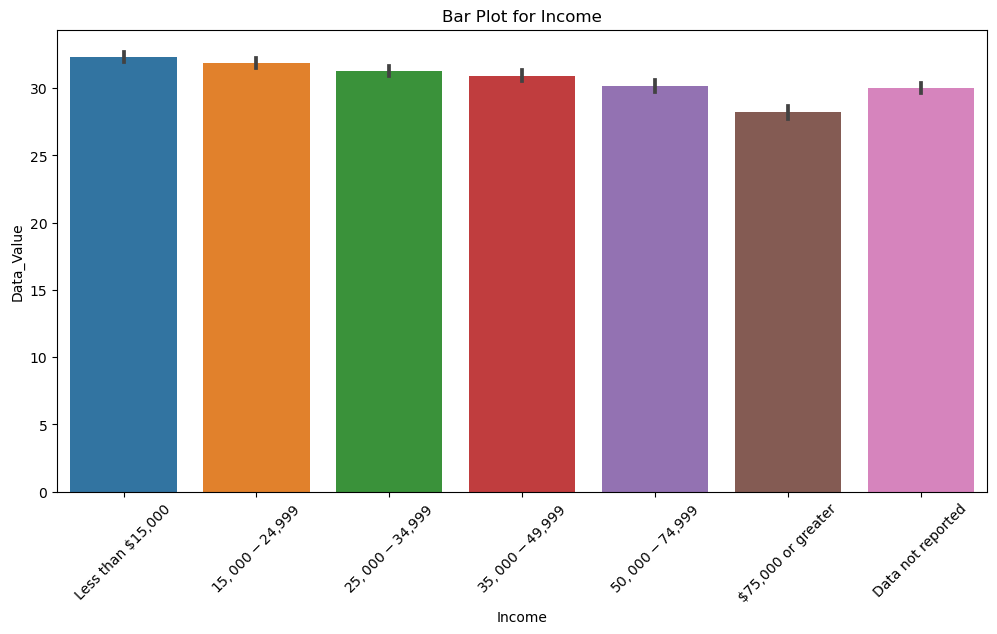

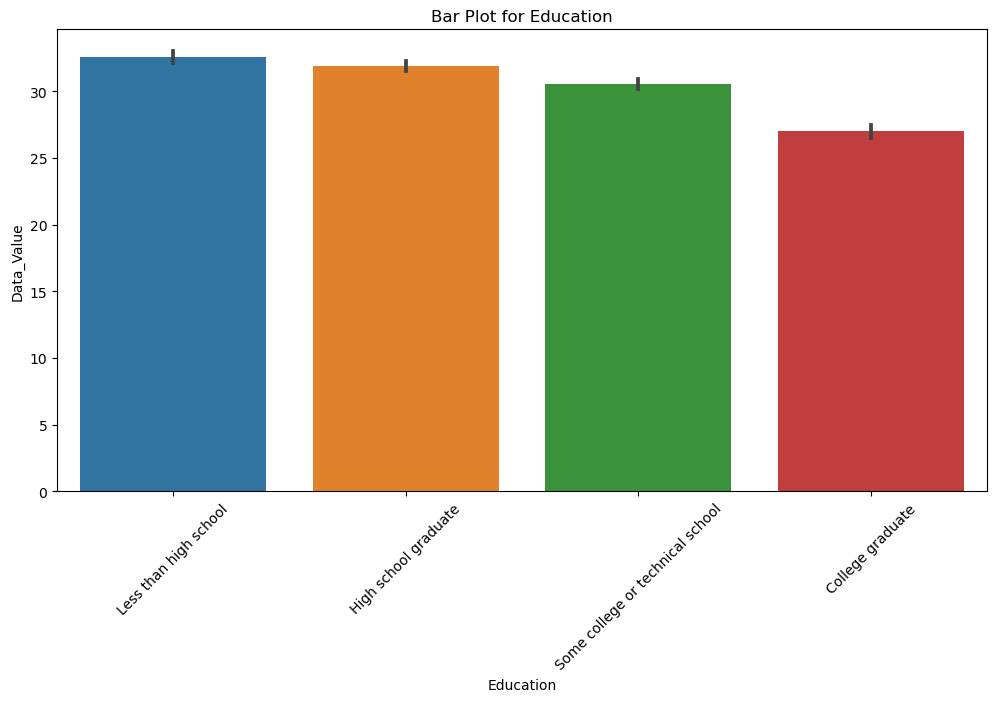

In [30]:
#columns for visualization
numerical_columns = ['YearStart', 'Data_Value']
categorical_columns = ['Income', 'Education']
# Plot categorical columns using bar plots
plt.figure(figsize=(12, 6))
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=column, y='Data_Value', data=df)
    plt.title(f'Bar Plot for {column}')
    plt.xticks(rotation=45)
    plt.show()
#This code will create a box plot for the Data_Value columns and individual bar plots for each of the categorical columns specified in the categorical_columns list. 


In [32]:
corr = numerical.corr()
corr

,YearStart,YearEnd,Data_Value,LocationID
YearStart,1.000000,1.000000,0.005077,0.043482
YearEnd,1.000000,1.000000,0.005077,0.043482
Data_Value,0.005077,0.005077,1.000000,0.003077
LocationID,0.043482,0.043482,0.003077,1.000000


<Axes: >

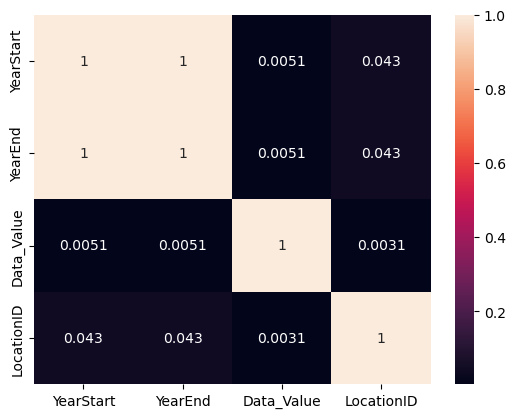

In [33]:
sns.heatmap(corr,annot=True)

In [37]:
numerical.drop(['YearEnd'],axis=1)

,YearStart,Data_Value,LocationID
0,2011,32.000000,1
1,2011,32.300000,1
2,2011,31.800000,1
3,2011,33.600000,1
4,2011,32.800000,1
...,...,...,...
53387,2016,30.624004,78
53388,2016,30.624004,78
53389,2016,30.624004,78
53390,2016,30.624004,78


In [38]:
x = numerical.drop(['Data_Value'],axis=1)
y = numerical['Data_Value']

In [39]:
x.shape

(52459, 3)

In [40]:
y.shape

(52459,)

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [42]:
x_scaler = StandardScaler().fit_transform(x_train)

In [43]:
x_scaler

array([[-1.35029121, -1.35029121,  1.1717957 ],
       [-0.16948102, -0.16948102, -0.73378364],
       [ 1.01132916,  1.01132916,  0.57630215],
       ...,
       [-0.16948102, -0.16948102, -1.74612266],
       [-1.35029121, -1.35029121, -0.19783945],
       [ 1.01132916,  1.01132916, -1.03153041]])

In [44]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred = model.predict(x_test)

In [46]:
model.coef_

array([ 0.01244209,  0.01244209, -0.000165  ])

In [47]:
model.intercept_

-19.46395191728323

In [48]:
r2score = metrics.mean_absolute_error(y_test,y_pred)


In [49]:
r2score

6.884748759516382